### 1. 
- Draw a linear regression line through the dataset dataset/w5-simple-regression-trainset.xlsx. 
- Please note: the excel file contains data only in Sheet1. Using Scikit-learn library allowed.


In [403]:
import pandas as pd

df = pd.read_excel('datasets/w5-simple-regression-trainset.xlsx', sheet_name="Sheet1")
df.head()

,x,y
0,1,76
1,2,78
2,2,85
3,4,88
4,2,72


In [404]:
x = df.iloc[:,0]
y = df.iloc[:,-1]
print(x)
print(y)

0     1
1     2
2     2
3     4
4     2
5     1
6     5
7     4
8     2
9     4
10    4
11    3
12    6
13    5
14    3
15    4
16    6
17    2
18    1
19    2
Name: x, dtype: int64
0     76
1     78
2     85
3     88
4     72
5     69
6     94
7     94
8     88
9     92
10    90
11    75
12    96
13    90
14    82
15    85
16    99
17    83
18    62
19    76
Name: y, dtype: int64


In [405]:
x.shape, y.shape

((20,), (20,))

In [406]:
# reshape so they both are (20,1) 

import numpy as np
# n = 20
n = x.shape[0]
x = x.values.reshape(n,1)
y = y.values.reshape(n,1)
x.shape, y.shape


((20, 1), (20, 1))

In [407]:
# building Linear regression model using scikit-learn
from sklearn.linear_model import LinearRegression
reg_model_scikit = LinearRegression()
reg_model_scikit.fit(x,y)

LinearRegression()

In [408]:
beta_1 = reg_model_scikit.coef_
beta_0 = reg_model_scikit.intercept_
print(f'The regression model is y = {beta_1}x + {beta_0}')

The regression model is y = [[5.25025747]]x + [67.16168898]


In [409]:
# have the model predict x
x_seq = np.linspace(0,8,100).reshape(-1,1) # for regression line plotting
y_pred = reg_model_scikit.predict(x_seq)

Text(0, 0.5, 'y')

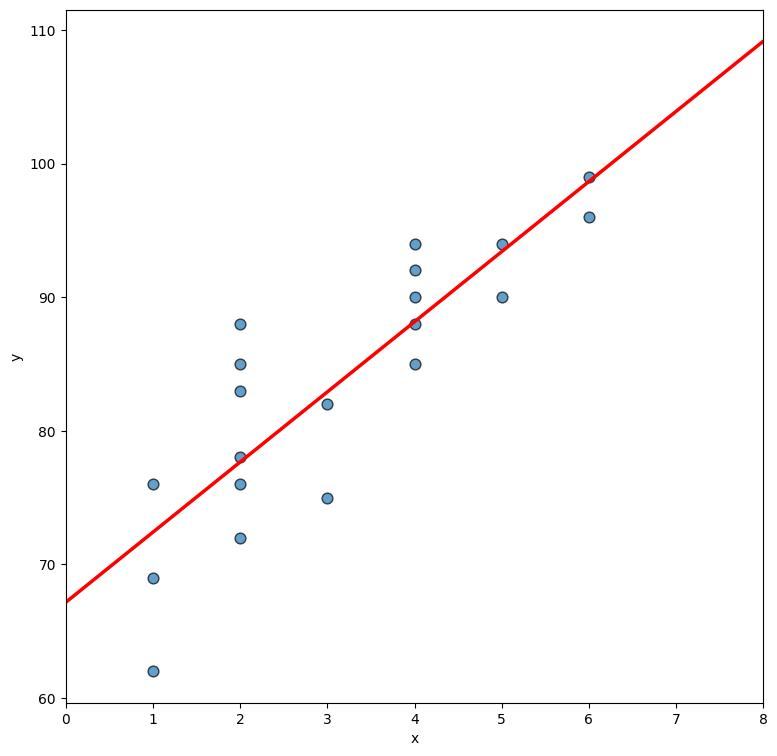

In [410]:
import matplotlib.pyplot as plt
# initialize layout 
fig, ax = plt.subplots(figsize=(9,9))

# add scatterplot
ax.scatter(x,y, s=60, alpha=0.7, edgecolors='k')
plt.xlim([0,8])

# generate x-axis points 
# plot regression line (red)
ax.plot(x_seq, y_pred, color='red', lw=2.5)
plt.xlabel('x')
plt.ylabel('y')

### 2.
- Draw polynomial regression lines of degree **2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100** through the dataset. 
- Evaluate each of the models (including the model in #1) on the test set **dataset/w5-simple-testset.xlsx** in terms of RMSE and R2-score. Comments? 
    - the smaller RMSE is the better
    - the closer R2 is to 1 the better
- Using scikit-learn library allowed.

In [411]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

testset_df = pd.read_excel('datasets/w5-simple-regression-testset.xlsx', sheet_name="Sheet1")
testset_df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [412]:
testset_x = df.iloc[:,0]
testset_y = df.iloc[:,-1]
print(testset_x.shape)
print(testset_y.shape)

(20,)
(20,)


In [413]:
# reshape so they both are (20,1) 

import numpy as np
# n = 20
testset_n = x.shape[0]
testset_x = x.reshape(n,1)
testset_y = y.reshape(n,1)
testset_x.shape, testset_y.shape


((20, 1), (20, 1))

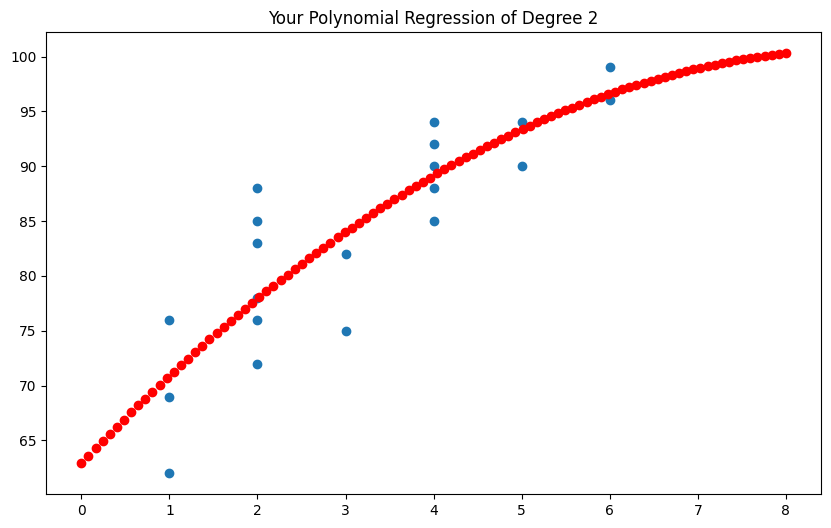

Evaluation result with degree 2
RMSE = 4.892821741877832 
R2_score = 0.7398141006652275


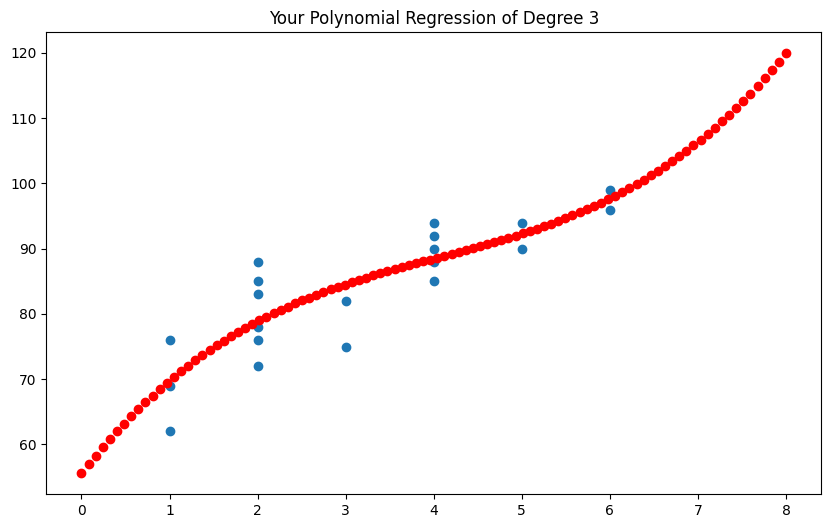

Evaluation result with degree 3
RMSE = 4.806411107143323 
R2_score = 0.7489230765039593


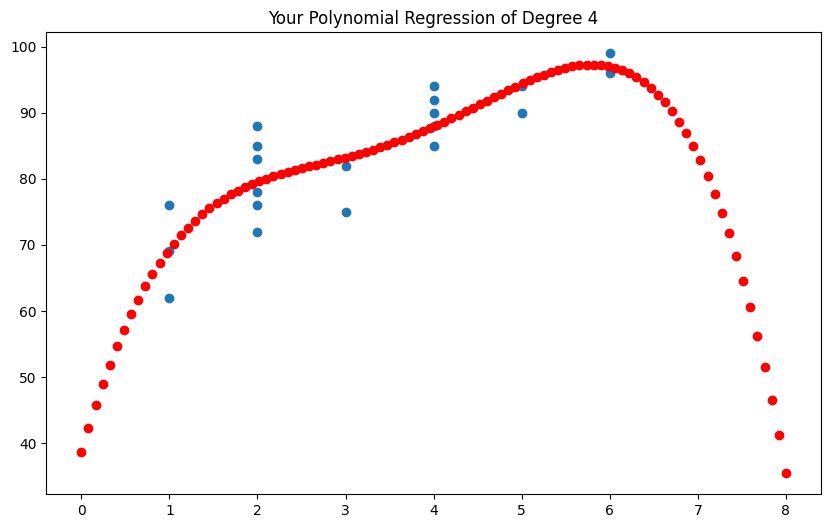

Evaluation result with degree 4
RMSE = 4.7126493071374975 
R2_score = 0.7586233725457718


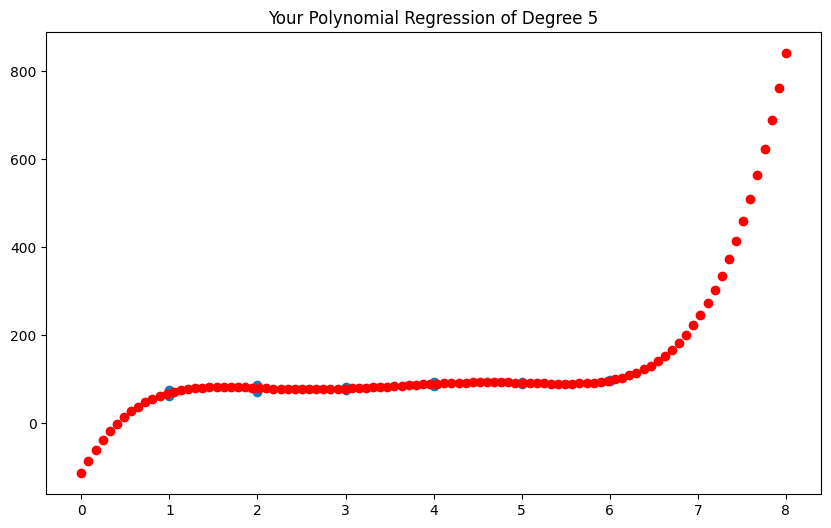

Evaluation result with degree 5
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


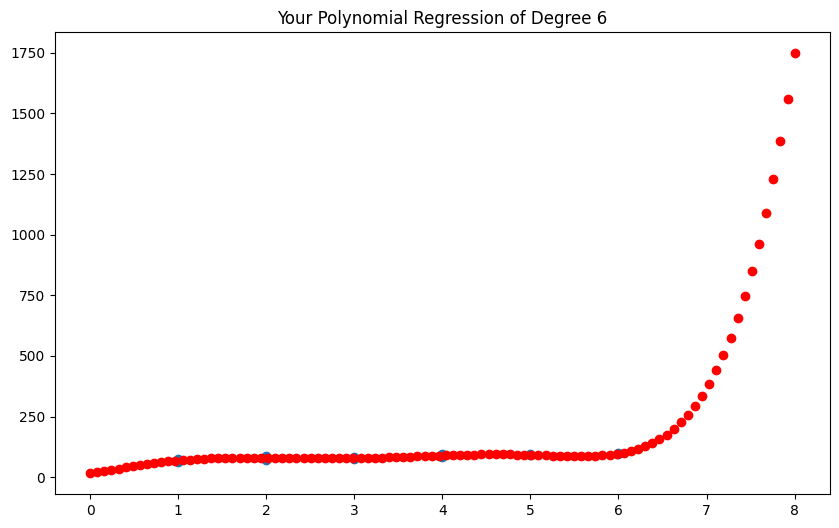

Evaluation result with degree 6
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


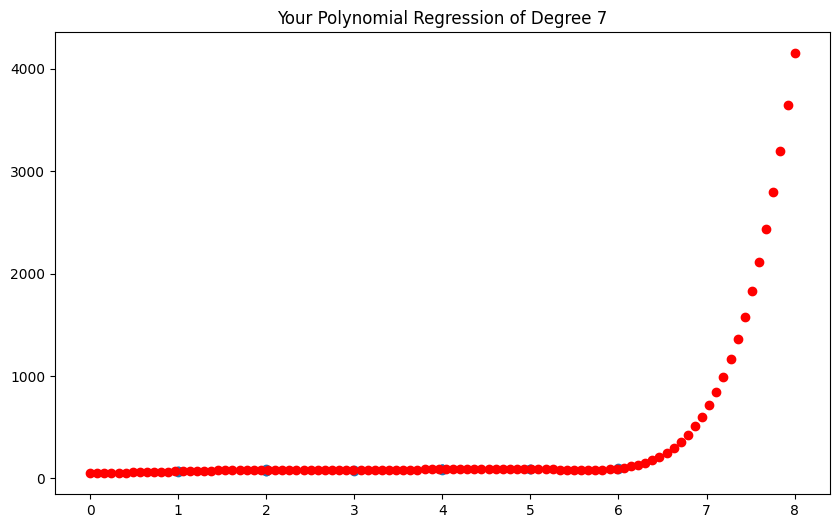

Evaluation result with degree 7
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


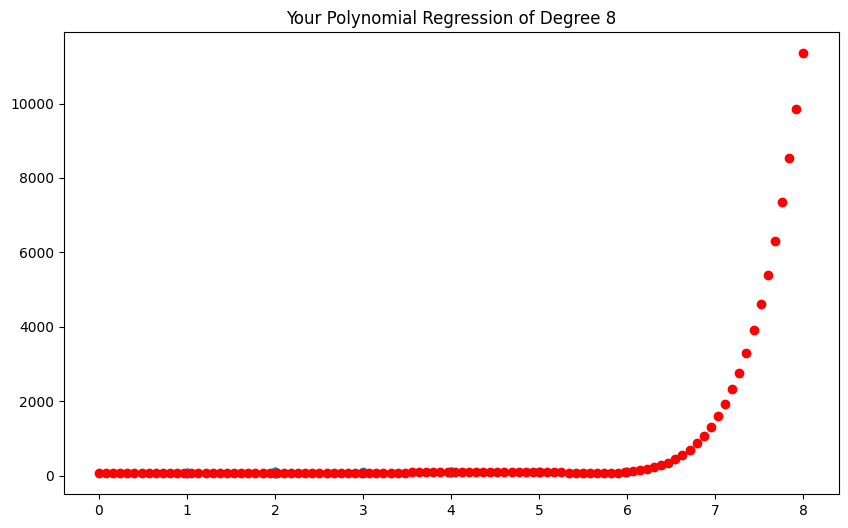

Evaluation result with degree 8
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


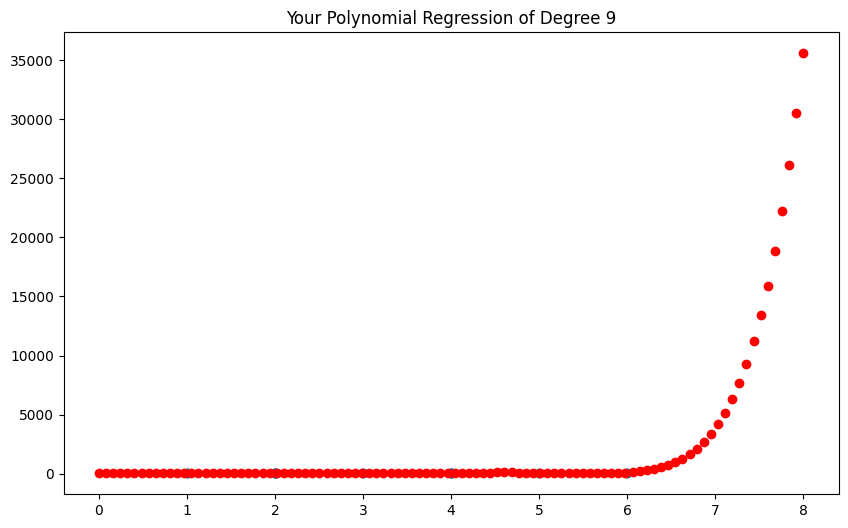

Evaluation result with degree 9
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


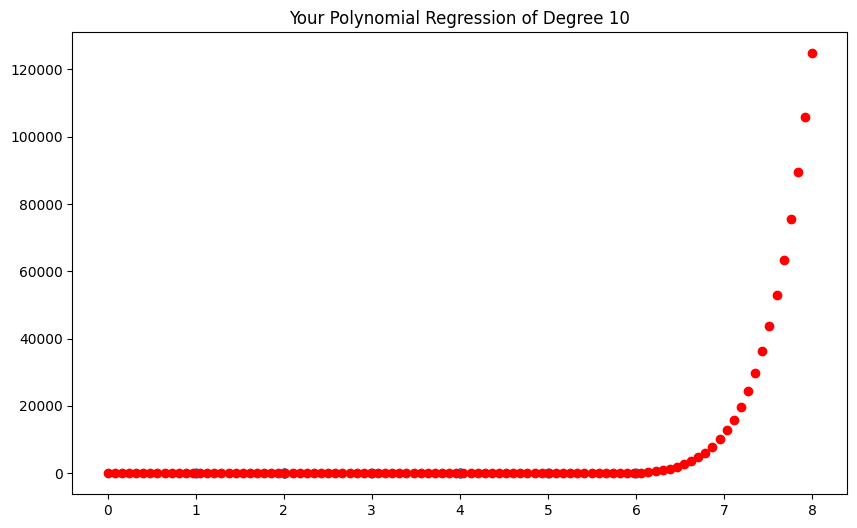

Evaluation result with degree 10
RMSE = 4.2727820757284904 
R2_score = 0.801579538455965


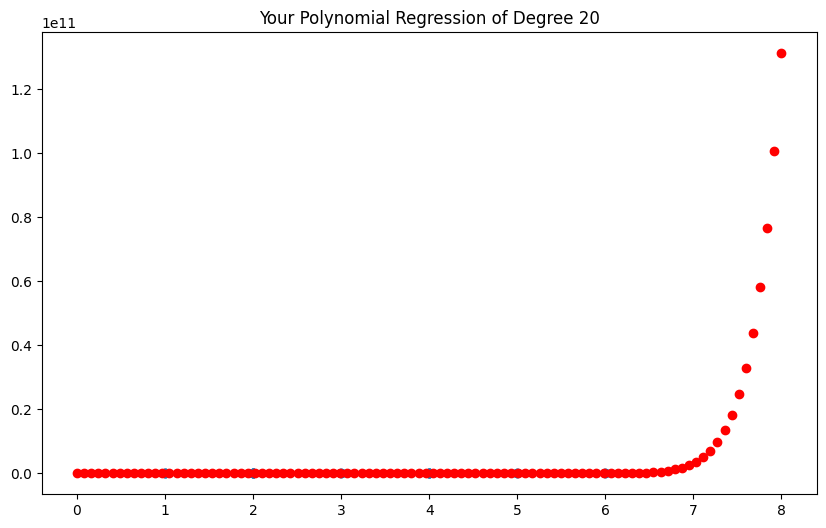

Evaluation result with degree 20
RMSE = 4.272782075729689 
R2_score = 0.8015795384558537


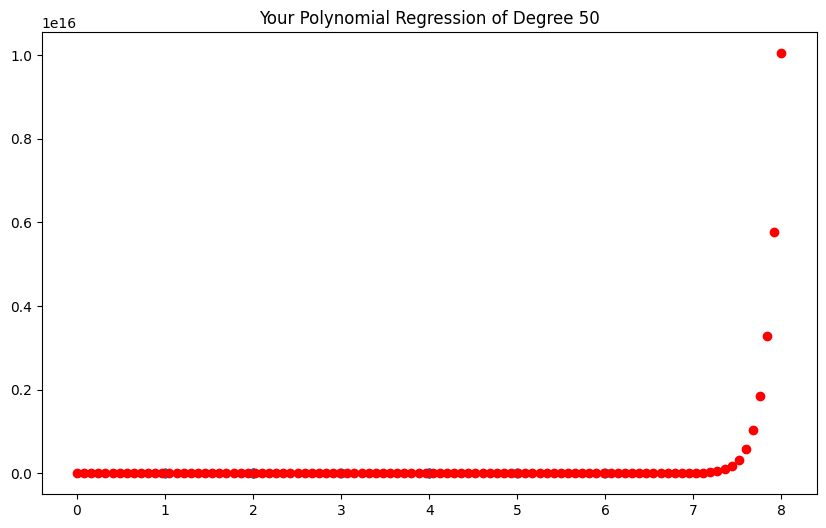

Evaluation result with degree 50
RMSE = 5.604501892221755 
R2_score = 0.6586192646460469


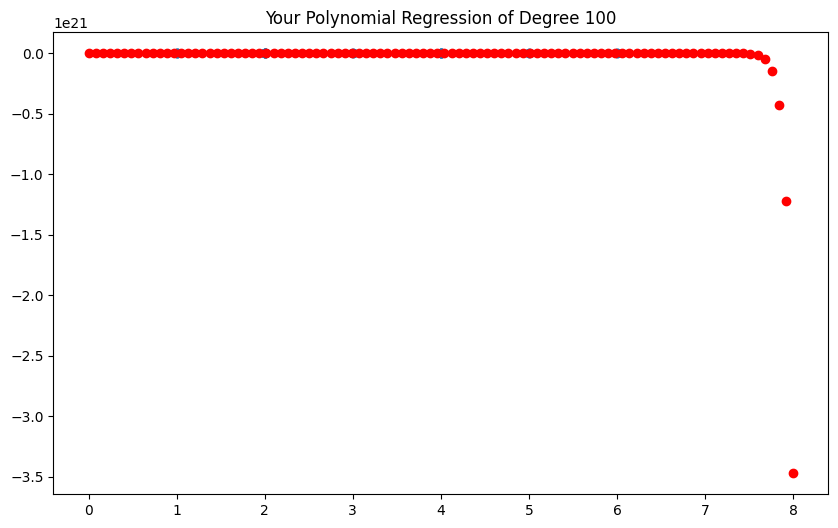

Evaluation result with degree 100
RMSE = 7.744151017029152 
R2_score = 0.3482026412938415


In [414]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]


for degree in degrees: 
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    poly_train_x = poly.fit_transform(x)
    poly_test_x = poly.transform(testset_x)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_train_x, y)

    testset_x_seq = np.linspace(0,8,100).reshape(-1,1) # for regression line plotting
    testset_x_seq_poly = poly.transform(testset_x_seq)

    y_predicted = poly_reg_model.predict(testset_x_seq_poly)
    # Make predictions on the test set
    predicted = poly_reg_model.predict(poly_test_x)

    plt.figure(figsize=(10,6))
    plt.title(f"Your Polynomial Regression of Degree {degree}")
    plt.scatter(x,y)
    plt.scatter(testset_x_seq,y_predicted, c='red')
    plt.show()

    print(f"Evaluation result with degree {degree}")
    print(f"RMSE = {np.sqrt(mean_squared_error(testset_y,predicted))} ")
    print(f"R2_score = {r2_score(testset_y,predicted)}")

### 3.
- Using scikit-learn library NOT ALLOWED: 
- Assuming you have gone through regression model lecture slides Week-04-05--Regression-ML-Fall2024.pdf. Build a simple linear regression model with the same dataset/w5-simple-regression-trainset.xlsx dataset in Sheet1 with the following methods: 
    - i) closed form solution, 
    - ii) batch gradient descent, 
    - iii) stochastic gradient descent, 
    - iv) mini-batch gradient descent. And, compare your results with the evaluation metrics you got in #2.
- For methods (ii)-(iv) vary value of learning rate and save all - evaluation metrics.
- For methods (iv) vary batch size and save all evaluation metrics.

In [415]:
train_df = pd.read_excel('datasets/w5-simple-regression-trainset.xlsx', sheet_name="Sheet1")
test_df = pd.read_excel('datasets/w5-simple-regression-testset.xlsx', sheet_name="Sheet1")
train_df.shape, test_df.shape


((20, 2), (6, 2))

In [416]:
x_train = train_df.iloc[:,0].values.reshape(-1,1)
y_train = train_df.iloc[:,-1].values.reshape(-1,1)
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20, 1), (20, 1), (6, 1), (6, 1))

In [417]:
# add bias term
# x0
X = np.hstack((np.ones([x_train.shape[0],1],x_train.dtype), x_train))
# x_train.shape[0] = 20
# [x_train.shape[0],1] = [20,1]
# np.ones([x_train.shape[0],1],x_train.dtype) = [[1],[1],[1]......[1]] creates 20 ones that are VERTICAL
# np.hstack((np.ones([x_train.shape[0],1],x_train.dtype))) = makes the 20 ones, horizontal 
# np.hstack((np.ones([x_train.shape[0],1],x_train.dtype), x_train)) = with the addition of x_train, the horizontal ones are "appended" with the x_train set

print(X)

[[1 1]
 [1 2]
 [1 2]
 [1 4]
 [1 2]
 [1 1]
 [1 5]
 [1 4]
 [1 2]
 [1 4]
 [1 4]
 [1 3]
 [1 6]
 [1 5]
 [1 3]
 [1 4]
 [1 6]
 [1 2]
 [1 1]
 [1 2]]


#### Closed Form
- **Closed Form**: Closed-form solutions are a simple and elegant way to find the best solution to a linear regression problem. They are generally faster than using an iterative optimization algorithm, like gradient descent
- General linear regression model equation: **Y = B0 + B1X1 + e**
    - e = random error
- Formula: 

![closed form image](https://miro.medium.com/v2/resize:fit:530/format:webp/1*uGNTGQtYACl-xfwRXB_-ZQ.png)

- Using **ml linalg** library we can create a program to find W
- **Transpose** flips the matrix, if it is 2x3 then it will become 3x2 

In [418]:
# [beta_0, beta_1]^T
beta = np.random.random_sample(size = (2,1)) 
print(beta)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y_train)
print(beta)


[[0.24671299]
 [0.31144629]]
[[67.16168898]
 [ 5.25025747]]


In [419]:
# x0, x
beta.shape

(2, 1)

In [420]:
print(f"Our regression model is: y_hat = {beta[1]}x + {beta[0]}")

Our regression model is: y_hat = [5.25025747]x + [67.16168898]


In [421]:
# now predict the test set with the model
# B^Tx where x is the sample 
x_test_with_bias = np.hstack((np.ones([x_test.shape[0],1], x_test.dtype), x_test))
print(x_test_with_bias)

[[1.  1.5]
 [1.  2.5]
 [1.  3.5]
 [1.  4.5]
 [1.  5.5]
 [1.  6.5]]


In [422]:
x_test_with_bias.shape

(6, 2)

In [423]:
# np.dot returns the dot product of two arrays
# y_pred is taking the test set with x0 and beta to find the prediction
y_pred = np.dot(x_test_with_bias, beta)
print(y_pred.shape)
print(y_pred)

(6, 1)
[[ 75.03707518]
 [ 80.28733265]
 [ 85.53759011]
 [ 90.78784758]
 [ 96.03810505]
 [101.28836251]]


In [424]:
rmse = np.sqrt(np.sum((y_test-y_pred)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.4273693764384


In [425]:
r2score = 1 - (np.sum((y_test-y_pred)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849821936348271


#### Batch gradient descent 
- The **gradient** is first-order derivative of the function at the current point
- We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.
- An **epoch** is one complete pass through the entire training dataset.
    - In batch gradient descent, the algorithm processes the entire training dataset at once to compute the gradients and update the model's weights.
    - After computing the gradients on the entire dataset, the weights are adjusted, which constitutes **one iteration**.
    - An epoch in this case means that the algorithm has seen all the data once and performed a weight update based on the gradients computed for the entire dataset.
- EX: If there are 5 examples in the training set, in ONE epoch ALL the examples are seen and ALL their gradients and model weights are calculated. A mean gradient is calculated, so only ONE model weight is updated.

![batch gradient image](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*P7z2BKhd0R-9uyn9ThDasA.png)

In [426]:
# initialize beta 
# [beta_0, beta_1]^T
beta = np.random.random_sample(size = (X.shape[1],1))
# beta_old will store beta scores from previous iterations
beta_old = beta.copy()

# num of sample
n = X.shape[0]
# learning rate 
alpha = 0.1
reach_convergence = False
delta = 0
eps = 1e-4

# other gradient update loop
i = 0
while reach_convergence == False:
    gradient = (1/n)* np.dot(X.T , (np.dot(X,beta) - y_train))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if i % 1000 == 0:
        print(f'Epoch {i+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
print(f'Epoch {i+1}: Batch Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

#### Explanation
# multiple epochs are being executed 
# in each Epoch the algorithm computes the gradient for the entire dataset and updates the model parameters once.

Epoch 1: beta = [[8.42455906], [27.38872639], delta = 27.92544980720592
Epoch 506: Batch Gradient Descent Algo Converged
Solution: beta = [[67.15658779], [5.2515783], delta = 9.898346743198778e-05


In [427]:
# now predict with it
y_pred_batch = np.dot(x_test_with_bias,beta)
y_pred_batch.shape

(6, 1)

In [428]:
rmse = np.sqrt(np.sum((y_test-y_pred_batch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.427394173972244


In [429]:
r2score = 1 - (np.sum((y_test-y_pred_batch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849797850143535


#### Stochastic Gradient Descent
- Good for larger amounts of data
- Instead of computing one mean gradient for the entire set, the gradient is computed and the model's weights are updated after processing each individual training example.
- This means that for a dataset with 𝑁 training examples, one epoch consists of 𝑁 updates, with the model being updated after every single example. Each time the algorithm processes one example, it performs an iteration (or step)
- EX: if my training data has 5 samples, in one epoch ALL 5 samples have been been seen. For each iteration within the epoch ONE exmple will be processed at time, where the gradient is computed and the model weight is adjusted. Since there are 5 samples, there are 5 iterations for one epoch. 
    


In [430]:

# initialize beta
# [beta_0, beta_1]^T
beta = np.random.random_sample(size = (X.shape[1],1)) 
# this will store beta scores from previous iteration
beta_old = beta.copy() 

In [431]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-6

In [432]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [433]:
#The gradient update loop
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a sample
    x_sample = X[indices[i],:].reshape(1,-1) #a row vector, not a column vector
    #compute gradient
    gradient =  np.dot(x_sample.T , (np.dot(x_sample,beta) - y_train[indices[i]]))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= n: # next epoch begins
        np.random.shuffle(indices)
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Stochastic Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

#### Explanation
# multiple epochs are being executed 
# in each Epoch the algorithm computes the gradient for EACH training sample and updates the model parameter EACH time.

Step 1: beta = [[1.41934154], [1.81301041], delta = 1.8348617780993213
Step 1001: beta = [[57.89087643], [7.30915419], delta = 0.04617884386134659
Step 2001: beta = [[65.8335403], [5.61601369], delta = 0.051135991243141214
Step 3001: beta = [[67.00481226], [5.17582887], delta = 0.014499038711758632
Step 4001: beta = [[67.14490755], [5.05743748], delta = 0.017422911939821154
Step 5001: beta = [[67.17401245], [5.11814515], delta = 0.18179575308774185
Step 6001: beta = [[67.23231544], [5.11139814], delta = 0.11535217539014246
Step 7001: beta = [[67.28628252], [5.56506261], delta = 0.045437453316713845
Step 8001: beta = [[67.13136551], [5.24620406], delta = 0.19293244402330592
Step 9001: beta = [[67.14682328], [5.28922556], delta = 0.04958476399011411
Step 10001: beta = [[67.23950345], [5.5395758], delta = 0.1572625420123662
Step 11001: beta = [[67.18551607], [5.14548963], delta = 0.07490292671341747
Step 12001: beta = [[67.07367754], [4.86514581], delta = 0.11307370094570163
Step 13001: b

In [434]:
#now predict with it
y_pred_stochastic = np.dot(x_test_with_bias,beta)
y_pred_stochastic.shape

(6, 1)

In [435]:
rmse = np.sqrt(np.sum((y_test-y_pred_stochastic)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.878365132648673


In [436]:
r2score = 1 - (np.sum((y_test-y_pred_stochastic)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7389452984224255


#### Mini-batch Gradient Descent
- In **mini-batch gradient descent**, the key difference is that instead of using the entire dataset (as in batch gradient descent) or a single example (as in stochastic gradient descent), the algorithm processes the data in small batches. 
1. Divide the dataset into smaller mini-batches (each batch containing a fixed number of examples).
2. For each mini-batch, calculate the gradient based on the examples in that batch.
3. Update the model parameters (weights) after each mini-batch using the computed gradient.
4. Repeat this process for all mini-batches to complete one epoch (i.e., one pass through the entire dataset).
5. Continue for multiple epochs until convergence.
- If your dataset has 𝑁 examples and your batch size is 𝑏, there will be 𝑁/𝑏 updates (iterations) per epoch.

In [437]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [438]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-3
b = 5 #batch_size


In [439]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [440]:
#create the batch of indices
batch_of_indices = []
if n%b == 0:
    num_of_batches = int(n / b)
else:
    num_of_batches = n // b + 1
idx = 0
for _ in range(num_of_batches):
    batch_of_indices.append(indices[idx:idx+b])
    idx = idx + b

In [441]:
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a batch of samples
    X_sample = X[batch_of_indices[i],:]
    y_sample = y_train[batch_of_indices[i]].reshape(-1,1)
    #print(f'X_sample.shape = {X_sample.shape}, y_sample.shape = {y_sample.shape}')
    
    #compute gradient
    gradient = (1/b)* np.dot(X_sample.T , (np.dot(X_sample,beta) - y_sample))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= num_of_batches: # next epoch begins
        np.random.shuffle(indices)
        #create the batch of indices (again)
        batch_of_indices = []
        if n%b == 0:
            num_of_batches = int(n / b)
        else:
            num_of_batches = n // b + 1
        idx = 0
        for _ in range(num_of_batches):
            batch_of_indices.append(indices[idx:idx+b])
            idx = idx + b
        #increment epoch counter
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Mini-batch Gradient Descent Algo (with batch_size = {b}) Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Step 1: beta = [[0.91699689], [2.63775682], delta = 2.139999861561428
Step 1001: beta = [[57.56765065], [7.7719074], delta = 0.064206038056953
Step 1336, Epoch 333: Mini-batch Gradient Descent Algo (with batch_size = 5) Converged
Solution: beta = [[61.99836736], [6.60338483], delta = 0.00088241110094925


In [442]:
#now predict with it
y_pred_minibatch = np.dot(x_test_with_bias,beta)
y_pred_minibatch.shape

(6, 1)

In [443]:
rmse = np.sqrt(np.sum((y_test-y_pred_minibatch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 5.067492715672588


In [444]:

r2score = 1 - (np.sum((y_test-y_pred_minibatch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7183114596137243


### 4. 
- Task 4. Build a regression model for dataset in dataset/w5-multi-regression-trainset.xlsx. Please note it's a multiple linear regression task. Using scikit-learn library allowed. Evaluate the model on the provided test set, dataset/w5-multi-regression-testset.xlsx in terms of RMSE and R2-score.

![multi linear regression](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vEiTz-vWkN3ilQBF4KpLMA.png)

In [453]:
multi_df = pd.read_excel('datasets/w5-multi-regression-trainset.xlsx')
multi_df.head()

,x1,x2,x3,x4,y
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [454]:
multi_df_x = multi_df.drop(columns=['y'])
multi_df_x.head()

,x1,x2,x3,x4
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [455]:
multi_df_y = multi_df['y']
multi_df_y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: y, dtype: float64

In [456]:
multi_df_x.shape,multi_df_y.shape

((45, 4), (45,))

In [457]:
n = multi_df_x.shape[0]
print(n)
multi_df_y = multi_df_y.values.reshape(n,1)
print(multi_df_y.shape)



45
(45, 1)


In [458]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

states_col = multi_df['x4']
other_col = multi_df_x.drop(columns='x4')

# One-Hot Encode the states column
enc = OneHotEncoder(handle_unknown='ignore',drop="first", sparse_output=False)
encoded_states = enc.fit_transform(multi_df[['x4']])
multi_df_x['x4'] = encoded_states
# print(encoded_states)
# print(enc.categories_)

enc_list = []
states_list = []

states_df = pd.DataFrame(encoded_states,columns=list(enc.categories_[0][1:]))
states_list.append(states_df)
states_dataset = pd.concat(states_list, axis=1)
states_dataset.index = multi_df_x.index
#drop the categorical feature columns
multi_df_x = multi_df_x.drop(columns=['x4'] )

multi_df_x = multi_df_x.join(states_dataset)
print(multi_df_x.head())

# Fit the model
multi_model = LinearRegression()
multi_model.fit(multi_df_x, multi_df_y)

# # Check the shapes
print(multi_df_x.shape, multi_df_y.shape)

          x1         x2         x3  Florida  New York
0  165349.20  136897.80  471784.10      0.0       1.0
1  162597.70  151377.59  443898.53      0.0       0.0
2  153441.51  101145.55  407934.54      1.0       0.0
3  144372.41  118671.85  383199.62      0.0       1.0
4  142107.34   91391.77  366168.42      1.0       0.0
(45, 5) (45, 1)


In [463]:
multi_df_y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [459]:
mult_beta_1 = multi_model.coef_
mult_beta_0 = multi_model.intercept_
for coeff in mult_beta_1.flatten():
    print(f'The regression model is y = {coeff}x + {mult_beta_0}')



The regression model is y = 0.7951175952431949x + [46157.70891763]
The regression model is y = -0.00019496299588349364x + [46157.70891763]
The regression model is y = 0.02884688089979005x + [46157.70891763]
The regression model is y = 881.9433731565586x + [46157.70891763]
The regression model is y = 1114.8072212330208x + [46157.70891763]


In [469]:
multi_sample = pd.DataFrame([[150000, 120000, 400000, 1.0, 0.0]],
                             columns=['x1', 'x2', 'x3', 'Florida', 'New York'])
multi_pred = multi_model.predict(multi_sample)
print(f"Predicted value: {multi_pred}")

Predicted value: [[177822.64837768]]


In [475]:
multi_prediction = multi_model.predict(multi_df_x)

In [473]:
multi_df_y.shape,multi_pred.shape

((45, 1), (1, 1))

In [476]:
print(f"RMSE = {np.sqrt(mean_squared_error(multi_df_y,multi_prediction))} ")
print(f"R2_score = {r2_score(multi_df_y,multi_prediction)}")

RMSE = 8435.61757372933 
R2_score = 0.9574051683433741


### 5. 
- Task 5. Now, do the same as in task #4 without scikit-learn library. Apply the 4 solution approaches: (i) closed-form solution, (ii) batch gradient descent, (iii) stochastic gradient descent, (iv) mini-batch gradient descent. Don't forget to tune the hyper-parameters like learning rate.. Compare with results obtained in task #4.

In [477]:
multi_train_df = pd.read_excel('datasets/w5-simple-regression-trainset.xlsx', sheet_name="Sheet1")
multi_test_df = pd.read_excel('datasets/w5-simple-regression-testset.xlsx', sheet_name="Sheet1")

In [478]:
multi_train_df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [479]:
multi_test_df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [480]:
multi_train_df.shape,multi_test_df.shape

((20, 2), (6, 2))